<a href="https://colab.research.google.com/github/ClementeGarcia/Simulaci-n-1/blob/main/Transformada_inversa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Método de la transformada inversa
Usando la distribución acumulada
Pasos:

1) Dado $f(x)$, calculamos

$$ F(x) = \int_{-\infty}^{\infty}f(\xi)d\xi$$

2) Generar $R \backsim  U(0,1)$

$$F(x) = R$$

para obtener

$$x = F^{-1}(R)$$


##Distribución triangular

La distribución triangular es una distribución de probabilidad continua con una función de densidad en forma de triángulo.

Donde:

$$f(x) =
\begin{cases}
\frac{2(x - a)}{(c - a)(b - a)} & \text{si } a \leq x \leq b, \\[10pt]
\frac{-2(x - c)}{(c-a)(c - b)} & \text{si } b < x \leq c, \\[10pt]
\end{cases} $$


Ahora obteniendo la acumulada

$$
F(x) =
\begin{cases}
\frac{(x - a)^2}{(b - a)(c - a)} & \text{si } a \leq x \leq c, \\[10pt]
1 - \frac{(b - x)^2}{(b - a)(b - c)} & \text{si } c \leq x \leq b, \\
\end{cases}$$

Donde

$ x = F^{-1}(R)$



$$
\begin{cases}
a + \sqrt{R(b-a)(c-a)} & \text{si } R \leq \frac{b-a}{c-a} \\[10pt]
c - \sqrt{(1-R)(c-b)(c-a)} & \text{otro caso }  \\
\end{cases}$$


Los valores a utilizar serán:

a = 1

b = 3

c = 5

In [1]:
import random as rd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def tri(n):
  #Inicializar una lista vacía para alamacener los números generados
  x = []
  for i in range(n):
    #Se genera un número aleatorio uniforme entre 0 y 1
    R = rd.random()
    #Si R es menor que 0.5, use la primera transforamción inversa
    if  R <0.5:
      x.append(np.sqrt(8*R)+1)
    else:
      x.append(5 - np.sqrt((1-R)*8))
      #Retora la lista con los números generados
  return x

In [3]:
a = tri(100000) #Se generan 100,000 npumeros aleatorios con distribución triangular

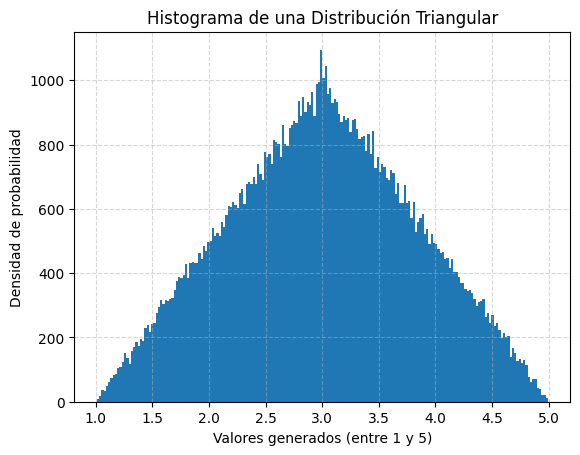

In [10]:
plt.hist(a, bins=200) #Histograma de una distribución triangular
plt.title("Histograma de una Distribución Triangular")
plt.xlabel("Valores generados (entre 1 y 5)")
plt.ylabel("Densidad de probabilidad")
plt.grid(True, linestyle='--', alpha=0.5)

#Media
Calculando la media teórica tenemos que:
$$
\mu=E[X]=\int_a^c x\,f(x)\,dx.
$$

$$
\mu=\frac{a+b+c}{3} .
$$
Sustituyendo los valores donde a = 1, b = 3 y c = 5 tenemos  que

$$
\mu=\frac{1+3+5}{3} = 3.
$$

In [5]:
np.mean(a) #Calculamos la media simulada

np.float64(3.0005178858613504)

#Varianza

Calculando la varianza teórica:

$$
\operatorname{Var}(X)=E[X^2]-\big(E[X]\big)^2.
$$

$$
E[X^2]=\int_a^c x^2 f(x)\,dx = I_{1}^*+I_{2}^*
$$
Por lo que realizando las operaciones correspondientes llegamos a que

$$
\operatorname{Var}(X)=\frac{1^2+3^2+5^2-(1)(3)-(1)(5)-(3)(5)}{18} = \frac{2}{3} = 0.66666667
$$


In [6]:
np.var(a) #Calculamos la varianza simulada

np.float64(0.6684296180937167)

In [8]:
np.std(a) #Calculamos la desviación enstándar simulada

np.float64(0.8175754510097014)

##Obtenemos la gráfica de nuestra función de distribución acumulativa

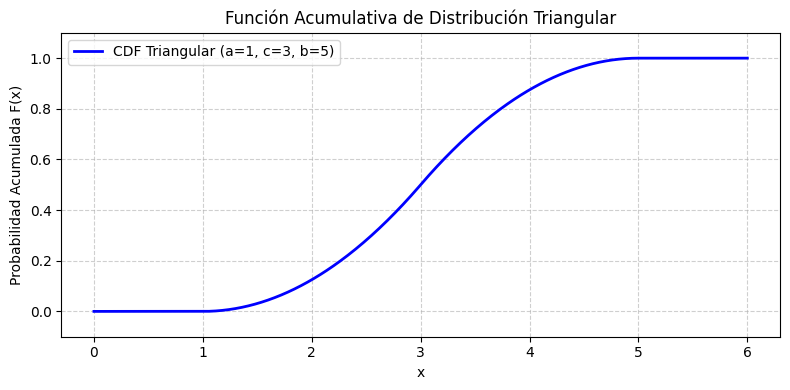

In [13]:
import numpy as np
import matplotlib.pyplot as plt

a = 1
c = 3
b = 5

# Crear valores de x desde a-1 hasta b+1
x = np.linspace(a - 1, b + 1, 500)

# Calcular la CDF manualmente
y = np.zeros_like(x)
for i, xi in enumerate(x):
    if xi < a:
        y[i] = 0
    elif a <= xi <= c:
        y[i] = (xi - a)**2 / ((b - a) * (c - a))
    elif c <= xi <= b:
        y[i] = 1 - (b - xi)**2 / ((b - a) * (b - c))
    else:
        y[i] = 1

# Graficar
plt.figure(figsize=(8, 4))
plt.plot(x, y, 'b-', linewidth=2, label=f'CDF Triangular (a={a}, c={c}, b={b})')

# Ajustes estéticos
plt.title('Función Acumulativa de Distribución Triangular')
plt.xlabel('x')
plt.ylabel('Probabilidad Acumulada F(x)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.ylim(-0.1, 1.1)
plt.tight_layout()
plt.show()